In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #used for data visualization
from textblob import TextBlob

In [2]:
df = pd.read_csv(r"C:\Users\akmal mirza\Desktop\project_results\merged data\merged data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\akmal mirza\\Desktop\\project_results\\merged data\\merged data.csv'

In [ ]:
df.shape

(19912, 14)

In [ ]:
df.head(5)

,show_id,type,title,director,cast_a,country,month_added,year_added,release_year,rating,duration,genre,description,ott_platform
0,s2,Movie,Take Care Good Night,Girish Joshi,Mahesh Manjrekar,India,March,2021.0,2018,13+,110 min,Drama,A Metro Family decides to fight a Cyber Crimin...,amazon_prime
1,s17,Movie,Zoombies,Glenn Miller,Marcus Anderson,Not Specified,Not Specified,NaN,2016,13+,87 min,Horror,When a strange virus quickly spreads through a...,amazon_prime
2,s201,Movie,Valentine Road,Marta Cunningham,Dawn Boldrin,Not Specified,Not Specified,NaN,2013,16+,88 min,Documentary,Valentine Road is a feature documentary examin...,amazon_prime
3,s1,Movie,The Grand Seduction,Don McKellar,Brendan Gleeson,Canada,March,2021.0,2014,Not Specified,113 min,Comedy,A small fishing village must procure a local d...,amazon_prime
4,s3,Movie,Secrets of Deception,Josh Webber,Tom Sizemore,United States,March,2021.0,2017,Not Specified,74 min,Action,After a man discovers his wife is cheating on ...,amazon_prime


DATA PREPROCESSING

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director           1
cast_a             0
country            0
month_added        0
year_added      9513
release_year       0
rating             0
duration           0
genre              0
description        0
ott_platform       0
dtype: int64

In [ ]:
null_percentage = df.isnull().sum() / len(df) * 100
print("null percentage:-")
null_percentage

null percentage:-


show_id          0.000000
type             0.000000
title            0.000000
director         0.005022
cast_a           0.000000
country          0.000000
month_added      0.000000
year_added      47.775211
release_year     0.000000
rating           0.000000
duration         0.000000
genre            0.000000
description      0.000000
ott_platform     0.000000
dtype: float64

In [ ]:
df['year_added'] = df['year_added'].fillna('Not Specified')


In [ ]:
df1 = df.dropna(subset=['director'])

In [ ]:
df1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast_a          0
country         0
month_added     0
year_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
ott_platform    0
dtype: int64

In [ ]:
null_percentage = df1.isnull().sum() / len(df1) * 100
print("null percentage:-")
null_percentage

null percentage:-


show_id         0.0
type            0.0
title           0.0
director        0.0
cast_a          0.0
country         0.0
month_added     0.0
year_added      0.0
release_year    0.0
rating          0.0
duration        0.0
genre           0.0
description     0.0
ott_platform    0.0
dtype: float64

In [ ]:
df.describe()

,release_year
count,19912.000000
mean,2010.537164
std,15.976259
min,1920.000000
25%,2010.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


SENTIMENT ANALYSIS

TEXT ANALYSIS

TOKENIZATION , POLARITY CALCULATION ASSIGN SENTIMENT TOKENS

In [ ]:
dfx = df1[['genre', 'description']] 

sentiments = []
for index, row in dfx.iterrows():
    testimonial = TextBlob(row['description'])
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    sentiments.append(sent)

dfx['Sentiment'] = sentiments

# Group by genre and sentiment, and calculate the total content
dfx = dfx.groupby(['genre', 'Sentiment']).size().reset_index(name='Total Content')  

colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'YELLOW'}

# Plot using Plotly
fig4 = px.bar(dfx, x="genre", y="Total Content", color="Sentiment", title="Sentiment of content by genre", 
              color_discrete_map=colors)  # Applying custom color palette
fig4.update_layout(
    width=1000,  #  width 
    height=1000,  # height 
)
fig4.show()

C:\Users\akmal mirza\AppData\Local\Temp\ipykernel_29952\3514369781.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Filter rows for each sentiment category
positive_df = dfx[dfx['Sentiment'] == 'Positive']
negative_df = dfx[dfx['Sentiment'] == 'Negative']
neutral_df = dfx[dfx['Sentiment'] == 'Neutral']

# Find row with maximum count for each sentiment category
max_positive_count_row = positive_df.loc[positive_df['Total Content'].idxmax()]
max_negative_count_row = negative_df.loc[negative_df['Total Content'].idxmax()]
max_neutral_count_row = neutral_df.loc[neutral_df['Total Content'].idxmax()]

# Print the results
print("Max Count of Positive Contents:")
print(max_positive_count_row)
print("")
print("Max Count of Negative Contents:")
print(max_negative_count_row)
print("")
print("Max Count of Neutral Contents:")
print(max_neutral_count_row)

Max Count of Positive Contents:
genre               Drama
Sentiment        Positive
Total Content        1260
Name: 71, dtype: object

Max Count of Negative Contents:
genre               Drama
Sentiment        Negative
Total Content         717
Name: 69, dtype: object

Max Count of Neutral Contents:
genre            Action-Adventure
Sentiment                 Neutral
Total Content                 450
Name: 6, dtype: object


trend detection

movies and tv shows released by year categorized by ott_platform

In [ ]:
# Filter DataFrame for movies
movies_df = df1[df1['type'] == 'Movie']

# Filter DataFrame for TV shows
shows_df = df1[df1['type'] == 'TV Show']

# Group the filtered DataFrames by 'release_year' and 'ott_platform' and count the number of releases
movie_release_year_counts = movies_df.groupby(['release_year', 'ott_platform']).size().unstack(fill_value=0)
show_release_year_counts = shows_df.groupby(['release_year', 'ott_platform']).size().unstack(fill_value=0)

print("count of movies released by year")
print(movie_release_year_counts.tail(10))

print("count of Tv shows released by year")
print(show_release_year_counts.tail(10))

count of movies released by year
ott_platform  amazon_prime  disney_plus  netflix
release_year                                    
2012                   197           29      173
2013                   227           20      225
2014                   295           34      264
2015                   282           23      396
2016                   402           30      658
2017                   403           33      765
2018                   438           32      767
2019                   730           60      633
2020                   736           74      517
2021                  1139           70      277
count of Tv shows released by year
ott_platform  amazon_prime  disney_plus  netflix
release_year                                    
2012                    55           12       64
2013                    62           12       62
2014                    96           15       88
2015                    96           23      161
2016                   119           30      244
2

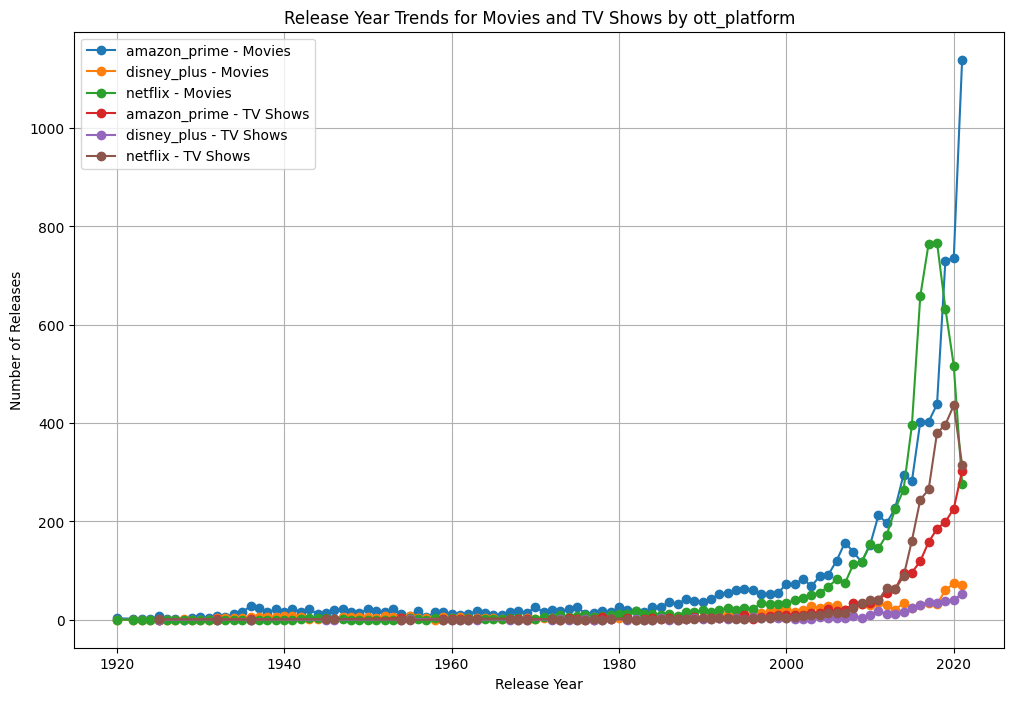

In [ ]:

# Plot the release year trends for movies and shows by ott_platform
plt.figure(figsize=(12, 8))

# Plot movies
for platform in movie_release_year_counts.columns:
    plt.plot(movie_release_year_counts.index, movie_release_year_counts[platform], marker='o', label=f'{platform} - Movies')

# Plot shows
for platform in show_release_year_counts.columns:
    plt.plot(show_release_year_counts.index, show_release_year_counts[platform], marker='o', label=f'{platform} - TV Shows')

plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.title('Release Year Trends for Movies and TV Shows by ott_platform')
plt.legend()
plt.grid(True)
plt.show()

MODULE EVALUTION

TOTAL NO OF CONTENTS RELEASED ACROSS ALL THE OTT PLATFORM

In [ ]:
# Calculate value counts of 'show_id'(SHOWS) by 'ott_platform'
show_id_counts = df1.groupby('ott_platform')['show_id'].count()
print(show_id_counts)

ott_platform
amazon_prime    9667
disney_plus     1444
netflix         8800
Name: show_id, dtype: int64


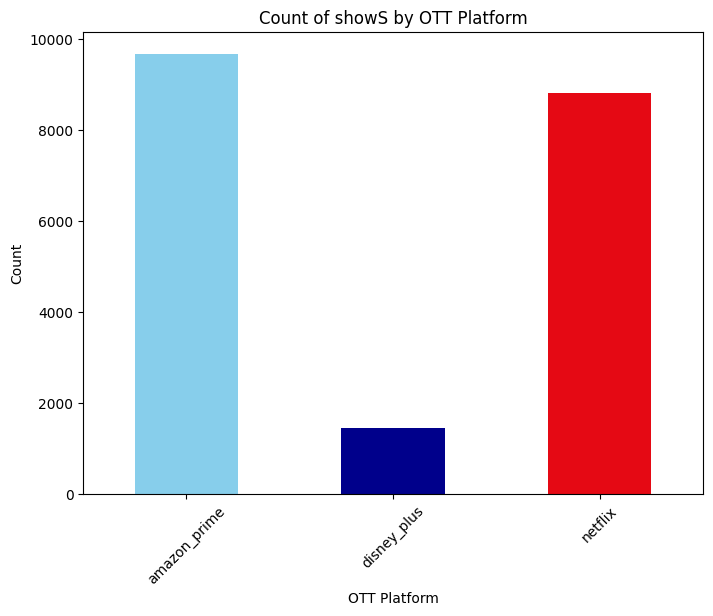

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))

# Define custom color palette for each OTT platform
color_palette = {'netflix': '#E50914', 'disney_plus': 'darkblue', 'amazon_prime': 'skyblue'}

# Plotting with custom color palette
show_id_counts.plot(kind='bar', color=[color_palette[platform] for platform in show_id_counts.index])

plt.title('Count of showS by OTT Platform')
plt.xlabel('OTT Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

avg. count every year released

In [ ]:
# Calculate count of entries
count_entries = df1.groupby(['release_year', 'ott_platform'])['show_id'].count().reset_index(name='count')

# Calculate the total count for each year
total_count_year = count_entries.groupby('release_year')['count'].sum().reset_index(name='total_count')

# Calculate the average count
average_entries = pd.merge(count_entries, total_count_year, on='release_year')
average_entries['average_count'] = average_entries['count'] / len(df1['release_year'].unique())

# Select only the 'release_year' and 'average_count' columns
average_entries = average_entries[['release_year', 'average_count']]

print(average_entries)

     release_year  average_count
0            1920       0.029703
1            1922       0.019802
2            1923       0.009901
3            1924       0.009901
4            1925       0.079208
..            ...            ...
259          2020       1.128713
260          2020       9.435644
261          2021      14.277228
262          2021       1.217822
263          2021       5.861386

[264 rows x 2 columns]


PERCENTAGE OF TV SHOW AND MOVIE ON RESPECTIVE ott_platform

In [ ]:
# Group the DataFrame by 'type' and 'ott_platform' and count the number of entries in each group
type_counts = df.groupby(['type', 'ott_platform']).size().reset_index(name='count')

# Calculate the total count for each ott_platform
ott_platform_totals = type_counts.groupby('ott_platform')['count'].sum()

# Calculate the percentage of each type within each ott_platform group
type_counts['percentage'] = type_counts.apply(lambda row: (row['count'] / ott_platform_totals[row['ott_platform']]) * 100, axis=1)

# Display the result
print(type_counts)

      type  ott_platform  count  percentage
0    Movie  amazon_prime   7814   80.823335
1    Movie   disney_plus   1051   72.783934
2    Movie       netflix   6126   69.613636
3  TV Show  amazon_prime   1854   19.176665
4  TV Show   disney_plus    393   27.216066
5  TV Show       netflix   2674   30.386364


TREND DETECTION

TOP 10 COUNTRIES with highest count of CONTENT categorised by type ACROSS THE ALL OTT PLATFORM

In [ ]:
# Calculate value counts by country, type, and OTT platform
country_counts = df1.groupby(['country', 'type', 'ott_platform']).size().reset_index(name='counts')

# Get the top 10 results
top_10_countries = country_counts.nlargest(10, 'counts')
top_10_countries_reset = top_10_countries.reset_index(drop=True)
# Filter out 'No Data' entries from the 'country' column
top_10_countries_filtered = top_10_countries[top_10_countries['country'] != 'No Data']

# Resetting the index of the filtered DataFrame starting from 0
top_10_countries_reset = top_10_countries_filtered.reset_index(drop=True)


print(top_10_countries_reset)

          country     type  ott_platform  counts
0   Not Specified    Movie  amazon_prime    7244
1   United States    Movie       netflix    2361
2   Not Specified  TV Show  amazon_prime    1751
3           India    Movie       netflix     927
4   United States    Movie   disney_plus     871
5   United States  TV Show       netflix     847
6   Not Specified    Movie       netflix     440
7   Not Specified  TV Show       netflix     392
8  United Kingdom    Movie       netflix     382
9   United States  TV Show   disney_plus     248


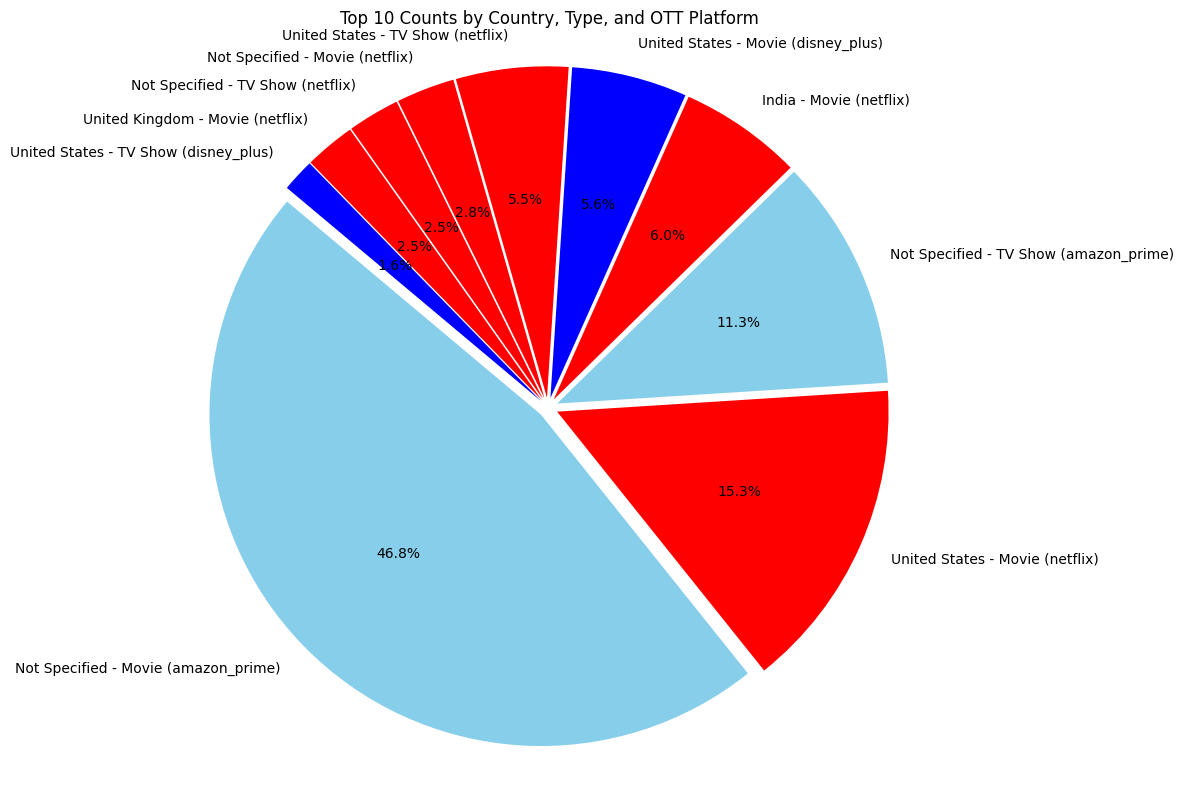

In [ ]:
# Define custom color palette for each OTT platform
color_palette = {'netflix': 'red', 'disney_plus': 'blue', 'amazon_prime': 'skyblue'}

# Plotting
plt.figure(figsize=(12, 8))

# Extracting data for pie chart
labels = [f"{row['country']} - {row['type']} ({row['ott_platform']})" for index, row in top_10_countries_reset.iterrows()]
sizes = top_10_countries_reset['counts']
colors = [color_palette[row['ott_platform']] for index, row in top_10_countries_reset.iterrows()]
explode = [0.03] * len(labels)  # Explode all slices for better visualization

# Creating pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Counts by Country, Type, and OTT Platform')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

In [ ]:
df1.to_csv(r"C:\Users\akmal mirza\Desktop\project_results\TABLEAU\results.csv", index=False)

In [ ]:
pip install geopandas

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 217.9 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/51.5 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 292.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB 5.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.1 MB 5.8 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 14.4 MB/s eta 0:00:02
   - -------------------------------------- 1.1/22.9 MB 13.7 MB/s eta 0:00:02
   -- ----------

In [ ]:
import geopandas as gpd

C:\Users\akmal mirza\AppData\Local\Temp\ipykernel_29952\2823141003.py:9: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



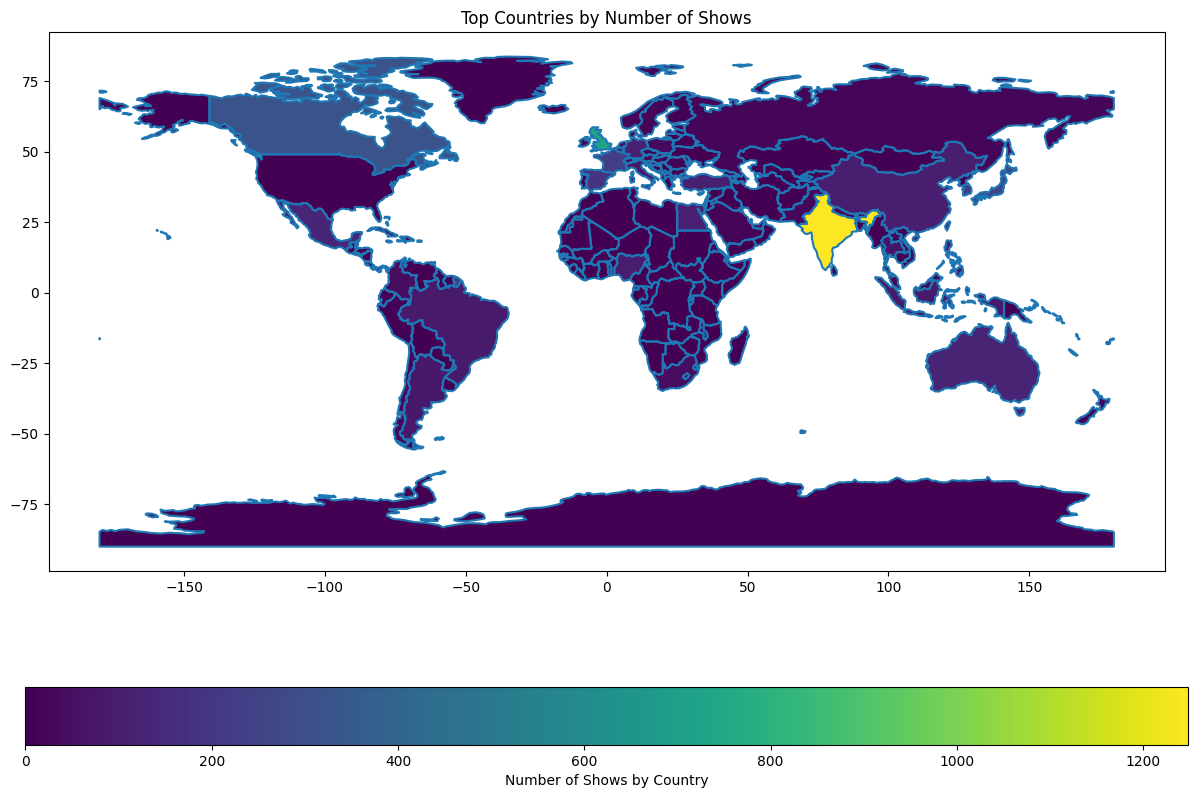

In [ ]:
# Exclude entries with "Not Mentioned" countries
df_filtered = df1[df1['country'] != "Not Specified "]

# Group by country and count the shows
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the counts with the world map
world = world.merge(country_counts, how="left", left_on="name", right_on="country")
world = world.fillna(0)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Shows by Country",
                        'orientation': "horizontal"})
plt.title("Top Countries by Number of Shows")
plt.show()

In [ ]:
# Exclude entries with "Not Mentioned" countries
df_filtered = df1[df1['country'] != "Not Specified"]

# Group by country and count the shows
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Limit to top 10 countries with the highest number of shows
top_countries = country_counts.nlargest(10, 'count')

In [ ]:
print(top_countries)

          country  count
0   United States   4619
1           India   1248
2  United Kingdom    726
3          Canada    321
4           Japan    261
5          France    228
6     South Korea    212
7           Spain    190
8          Mexico    136
9       Australia    126


In [ ]:
df_filtered = df[df['country'] != "Not Mentioned"]

# Group by country and count the shows
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sort the counts in ascending order to get the least show contents
least_country_counts = country_counts.sort_values(by='count').head(10)

print(least_country_counts)

        country  count
88     Slovenia      1
69    Guatemala      1
70       Cyprus      1
71  Puerto Rico      1
72      Belarus      1
73      Senegal      1
74   Luxembourg      1
75     Cameroon      1
76      Somalia      1
77      Jamaica      1


C:\Users\akmal mirza\AppData\Local\Temp\ipykernel_29952\2215305811.py:12: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



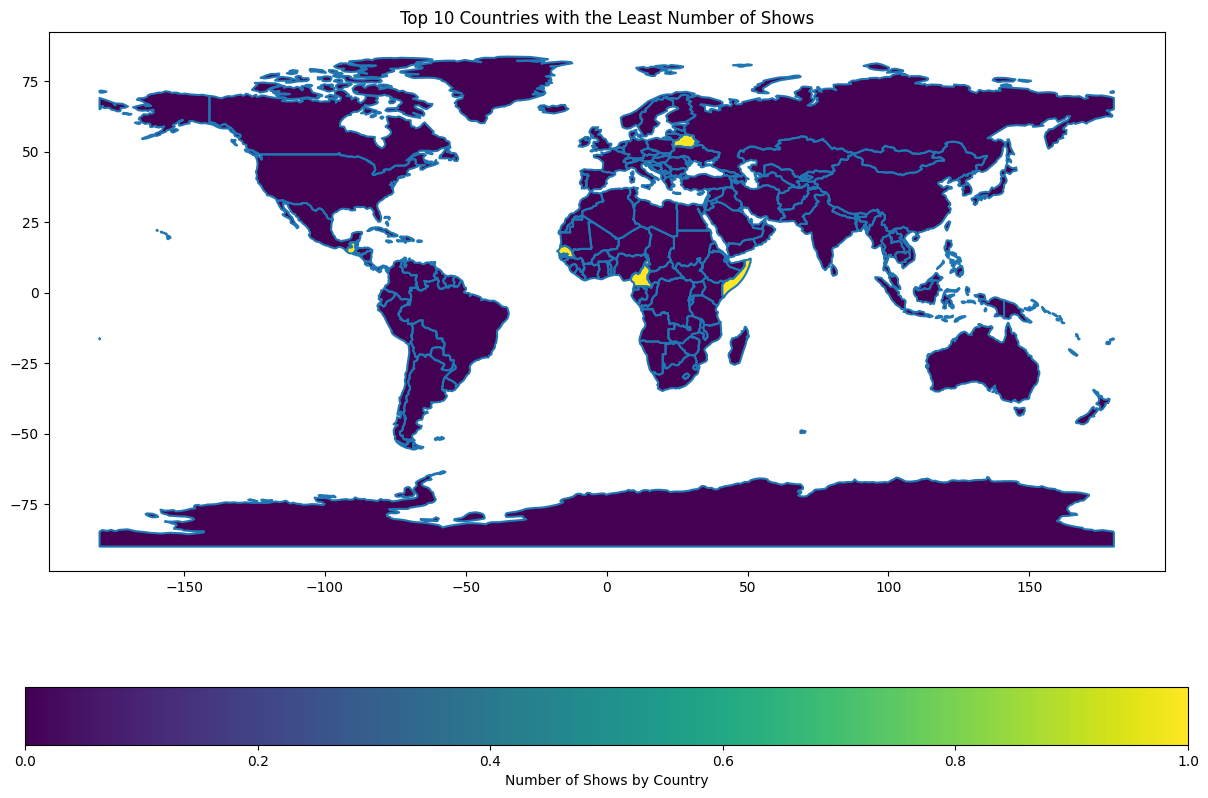

In [ ]:
# Exclude entries with "Not Specified" countries
df_filtered = df[df['country'] != "Not Specified"]

# Group by country and count the shows
country_counts = df_filtered['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Sort the counts in ascending order to get the top 10 least show contents
least_country_counts = country_counts.sort_values(by='count').head(10)

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the counts with the world map
world = world.merge(least_country_counts, how="left", left_on="name", right_on="country")
world = world.fillna(0)

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='count', ax=ax, legend=True,
           legend_kwds={'label': "Number of Shows by Country",
                        'orientation': "horizontal"})
plt.title("Top 10 Countries with the Least Number of Shows")
plt.show()